In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Himmelblau
dims = 2
def loglike(z):
    z1 = z[:, 0]
    z2 = z[:, 1]
    return - (z1**2 + z2 - 11.)**2 - (z1 + z2**2 - 7.)**2
def transform(x):
    return 5. * x

In [6]:
# Rosenbrock
dims = 4
def loglike(z):
    return np.array([-sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1 - x[:-1]) ** 2.0) for x in z])
def transform(x):
    return 5. * x

In [7]:
# Gauss
#corr = 0.99
#dims = 2
#def loglike(x):
#    return multivariate_normal.logpdf(x, mean=np.zeros(dims), cov=np.eye(dims) + corr * (1 - np.eye(dims)))
#def transform(x):
#    return 3. * x

In [8]:
sampler = NestedSampler(dims, loglike, transform=transform, num_live_points=1000, hidden_dim=128, num_layers=1, num_blocks=5, scale='')

Creating directory for new run logs/test/run33
[nnest.trainer] [INFO] SingleSpeed(
  (net): FlowSequential(
    (0): CouplingLayer(
      (scale_net): Sequential(
        (0): Linear(in_features=4, out_features=128, bias=True)
        (1): Tanh()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): Tanh()
        (4): Linear(in_features=128, out_features=4, bias=True)
      )
      (translate_net): Sequential(
        (0): Linear(in_features=4, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): ReLU()
        (4): Linear(in_features=128, out_features=4, bias=True)
      )
    )
    (1): CouplingLayer(
      (scale_net): Sequential(
        (0): Linear(in_features=4, out_features=128, bias=True)
        (1): Tanh()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): Tanh()
        (4): Linear(in_features=128, out_features=4, bias=True)
      )
      (translat

In [9]:
sampler.run()

[nnest.sampler] [INFO] MCMC steps [20]
[nnest.sampler] [INFO] Initial scale [1.0000]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0226]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0404] validation loss [0.0370]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0326] validation loss [0.0323]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0308] validation loss [0.0313]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0297] validation loss [0.0306]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0292] validation loss [0.0304]
[nnest.trainer] [INFO] Epoch [250] train loss [0.0287] validation loss [0.0309]
[nnest.trainer] [INFO] Epoch [264] ran out of patience
[nnest.trainer] [INFO] Best epoch [214] validation loss [0.0303]
[nnest.sampler] [INFO] Step [0] loglstar [-1.9067e+05] max logl [-6.3006e+00] logz [-1.9067e+05] vol [1.00000e+00] ncalls [1001] mean calls [1.0000]
[nnest.sampler] [

[nnest.trainer] [INFO] Epoch [106] ran out of patience
[nnest.trainer] [INFO] Best epoch [56] validation loss [-0.0210]
[nnest.sampler] [INFO] Acceptance [0.4400] min ESS [5.2150] max ESS [15.5608] average jump distance [0.1105]
[nnest.sampler] [INFO] Step [5000] loglstar [-3.6882e+02] maxlogl [-6.3006e+00] logz [-3.7937e+02] vol [6.73795e-03] ncalls [46934] scale [0.4306]
[nnest.sampler] [INFO] Acceptance [0.5350] min ESS [5.6831] max ESS [9.8842] average jump distance [0.1069]
[nnest.sampler] [INFO] Step [5200] loglstar [-3.1636e+02] maxlogl [-2.4852e+00] logz [-3.2646e+02] vol [5.51656e-03] ncalls [49491] scale [0.6158]
[nnest.sampler] [INFO] Acceptance [0.5650] min ESS [5.7544] max ESS [10.1060] average jump distance [0.0988]
[nnest.sampler] [INFO] Step [5400] loglstar [-2.7349e+02] maxlogl [-2.4852e+00] logz [-2.8411e+02] vol [4.51658e-03] ncalls [52266] scale [0.4152]
[nnest.sampler] [INFO] Acceptance [0.5100] min ESS [4.9674] max ESS [8.6765] average jump distance [0.0974]
[nnes

[nnest.sampler] [INFO] Acceptance [0.6350] min ESS [4.7522] max ESS [6.3177] average jump distance [0.0453]
[nnest.sampler] [INFO] Step [9400] loglstar [-2.2162e+01] maxlogl [-3.7090e-01] logz [-3.4099e+01] vol [8.27241e-05] ncalls [108877] scale [0.2918]
[nnest.sampler] [INFO] Acceptance [0.5600] min ESS [2.4057] max ESS [7.8863] average jump distance [0.0537]
[nnest.sampler] [INFO] Step [9600] loglstar [-1.9614e+01] maxlogl [-3.7090e-01] logz [-3.1652e+01] vol [6.77287e-05] ncalls [111769] scale [0.1797]
[nnest.sampler] [INFO] Acceptance [0.4950] min ESS [7.0171] max ESS [13.8533] average jump distance [0.0594]
[nnest.sampler] [INFO] Step [9800] loglstar [-1.7339e+01] maxlogl [-3.7090e-01] logz [-2.9503e+01] vol [5.54516e-05] ncalls [114784] scale [0.2300]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0020]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0635] validation loss [-0.0663]
[nnest.trainer] [INFO] Epoch [50] train loss [

[nnest.trainer] [INFO] Best epoch [38] validation loss [-0.1059]
[nnest.sampler] [INFO] Acceptance [0.5650] min ESS [4.4383] max ESS [21.0000] average jump distance [0.0440]
[nnest.sampler] [INFO] Step [14000] loglstar [-2.7085e+00] maxlogl [-1.0417e-01] logz [-1.6272e+01] vol [8.31529e-07] ncalls [179318] scale [1.1491]
[nnest.sampler] [INFO] Acceptance [0.5400] min ESS [5.4072] max ESS [21.0000] average jump distance [0.0490]
[nnest.sampler] [INFO] Step [14200] loglstar [-2.4798e+00] maxlogl [-1.0417e-01] logz [-1.6149e+01] vol [6.80798e-07] ncalls [182409] scale [0.7557]
[nnest.sampler] [INFO] Acceptance [0.6150] min ESS [4.2381] max ESS [21.0000] average jump distance [0.0484]
[nnest.sampler] [INFO] Step [14400] loglstar [-2.2539e+00] maxlogl [-1.0417e-01] logz [-1.6037e+01] vol [5.57390e-07] ncalls [185544] scale [1.1691]
[nnest.sampler] [INFO] Acceptance [0.5550] min ESS [6.8607] max ESS [21.0000] average jump distance [0.0586]
[nnest.sampler] [INFO] Step [14600] loglstar [-2.072

In [10]:
print(sampler.logz)

-15.21672202681788


In [11]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=sampler.loglikes)

Removed no burn in


In [12]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

7004.909078884051
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      7.5371877E-01  4.1694189E-01  6.7714416E-01  1.1517950E+00  two   -1.9537011E-01  1.2647840E+00  two   -9.3163258E-01  1.2777180E+00  two     p_{1}
param2      7.4360474E-01  3.7993347E-01  4.4540403E-01  1.2295567E+00  two    4.7338393E-03  1.3690050E+00  two   -6.6352235E-02  1.4571069E+00  two     p_{2}
param3      7.0147659E-01  5.4059835E-01 -2.5912504E-02  1.0166724E+00  two   -1.1122741E-01  1.7476137E+00  two   -1.5676770E-01  2.0685506E+00  two     p_{3}
param4      7.8442456E-01  9.6930225E-01 -1.2379905E-01  9.7124928E-01  two   -1.8495268E-01  3.0386451E+00  two   -2.1590415E-01  4.6793703E+00  two     p_{4}



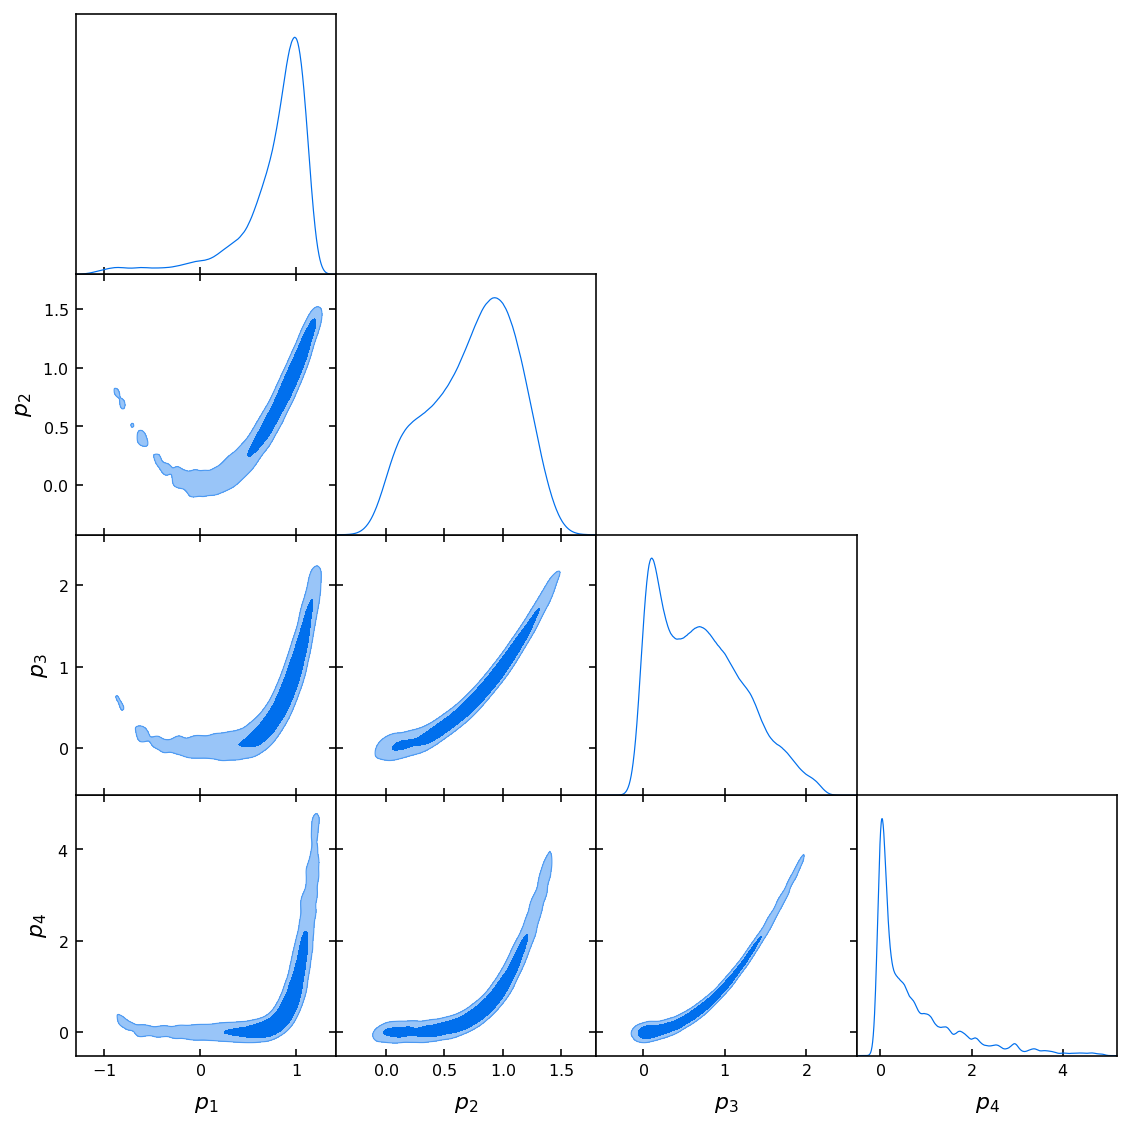

In [13]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)